# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?


$$w_{new} = w_{old} - a\frac{2}{n}\sum_{j_i=1}^{n}x_{j_i}(\langle w_{old}x_{j_i} \rangle - y_{j_i}) -  \frac{2a}{C}w_{old}$$
   

градиент это направление увеличения фии 


-градиент это напрваления уменьшения фии (в нашем случае функционала качества, те увеличение точности)

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$$w_{new} = w_{old} -\frac{a}{n}\sum_{j_i=1}^{n}x_{j_i}(\frac{1}{1 + e^{\langle w_{old}x_{j_i} \rangle}} - y_{i_j} )  -  \frac{2a}{C} w_{old}$$


$$w_{new} = w_{old} -\frac{Const}{n}\sum_{j_i=1}^{n}x_{j_i}(a(x_i) - y_{i_j} )  -  \frac{Const}{C} w_{old}$$
фии одинаковы отличаются только а

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

$$Q(X,w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$

$$H(Q(X,w)) = ( \frac{\partial^{2} Q}{\partial w_{i} \partial w_{j}} )$$

$$H(Q(X,w)) = \frac{2}{n}( \langle x_ix_j \rangle)$$

это матрица грамма которая положительно определенна если иксы ЛНЗ

$Q(X,w) = \frac{1}{n}(w^{T} X^{T} X w - w^{T} X^{T}y - y^{T}Xw + y^{T}y) + \frac{1}{C}w^{T}w$

$ \nabla_{w}Q(X,w) = 2X^{T}Xw - 2X^{T}y + \frac{2}{C}w $

$ \nabla_{w}Q(X,w) = 0 \iff w = (X^{T}X + \frac{1}{C})^{-1} X^{T}y $

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

$E = -p * log(a) - (1 - p) * log(1 - a)$

$\frac{\partial E}{\partial a} = \frac{-p}{a}-(-1)\frac{1-p}{1-a} =\frac{-p+ap}{a(1-a)}+\frac{a-ap}{a(1-a)}=\frac{a-p}{a(1-a)} = 0$

$ a-p=0 $

$ a = p $,экстремум

$\frac{\partial^2 E}{\partial a^2} = \frac{a(1-a) - (a-p)(1-2a)}{a^2(1-a)^2} =\frac{a-a^2 -a + p + 2a^2 - 2ap}{a^2(1-a)^2}=
\frac{a^2 + p -2ap}{a^2(1-a)^2} = ${в точке a=p}$ = \frac{p-p^2}{p^2(1-p)^2} =\frac{1}{p(1-p)} $
$(0<=p<=1) => \frac{\partial^2 E}{\partial a^2} >0 $

значит точка a = p это минимиум

$a(x_i) = p(y_i = 1|x_i)$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

нет не надо  
$w_0$ отвечает за сдвиг прямой $$y = -\frac{(x*w_1 + w_0)}{w_2}   $$

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [1]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [7]:
new_generator = fib(10)
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 4 fib values: 3
Fib num: 5 fib values: 5
Fib num: 6 fib values: 8
Fib num: 7 fib values: 13
Fib num: 8 fib values: 21
Fib num: 9 fib values: 34


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [127]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [128]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [4]:
def batch_generator(X, y, shuffle=True, batch_size=1, MaxEpoch = 10):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    indexes = np.arange(X.shape[0],dtype = int) * np.ones(MaxEpoch,dtype = int).reshape(MaxEpoch, -1)
    for j in range(MaxEpoch):
        np.random.shuffle(indexes[j])
    indexesUse = indexes[::, :batch_size:]
    
    Xu = np.copy(X)
    yu = np.copy(y)
    if shuffle:
        np.random.shuffle(Xu)
        np.random.shuffle(y)
        
    estr = np.ones(batch_size).reshape(batch_size, -1)
    for i in indexesUse:
        X_batch =np.hstack((estr, Xu[i]))
        y_batch = yu[i]
        yield (X_batch, y_batch)
    


# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [64]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    ## Your code Here
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self,  batch_generator, C = 1, alpha = 0.01, max_epoch = 10, model_type = 'lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        #self.weights = weights
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        loss = 0
        if self.model_type == 'lin_reg':
            for i in range(X_batch.shape[0]):
                loss = loss + (y_batch[i] - np.dot(X_batch[i],self.weights)) ** 2
            loss = loss / X_batch.shape[0]
            
        if self.model_type == 'log_reg':
            for i in range(X_batch.shape[0]):
                loss = loss + (y_batch[i] - 1) * np.dot(X_batch[i],self.weights)- np.log(1 + np.exp(-np.dot(X_batch[i],self.weights)))
            loss = loss* (-1 / X_batch.shape[0])
        return loss
            
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        loss_grad = 0
        n = X_batch.shape[0]
        
        if self.model_type == 'lin_reg':
            for i in range(n):
                loss_grad = loss_grad + (np.dot(X_batch[i],self.weights) - y_batch[i]) * X_batch[i]
            loss_grad = loss_grad * 2 * self.alpha / n 
            reg = self.weights * 2 * self.alpha / self.C
            reg[0] = 0
            
            return loss_grad + reg
        
        if self.model_type == 'log_reg':
            for i in range(n):
                #loss_grad = loss_grad + np.exp(np.dot(X_batch[i],self.weights))/(np.exp(np.dot(X_batch[i],self.weights))+1) + y_batch[i] - 1
                loss_grad = loss_grad + X_batch[i] * (y_batch[i] - 1/(1 + np.exp(- np.dot(X_batch[i],self.weights))))
            loss_grad = loss_grad * self.alpha / n 
            reg = self.weights * 2 * self.alpha / self.C
            reg[0] = 0
            
            return -loss_grad + reg
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - new_grad
        pass
    
    def fit(self, Xu, yu):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        X = np.copy(Xu)
        y = np.copy(yu)
        estr = np.ones(Xu.shape[0]).reshape(Xu.shape[0], -1)
        X=np.hstack((estr, X))
        
        # Нужно инициализровать случайно веса
        self.weights = np.random.randint(0, 5, X.shape[1])
        #self.w0 = np.random.randint(0,5,1)
        new_epoch_generator = self.batch_generator
        for n in range(0, self.max_epoch):
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                #print(self.weights)
                self.update_weights(batch_grad)
                #print("веса", self.weights)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        #self.spec = batch_loss
                
        return self
    def givew(self):
        return self.weights
    def givee(self):
        return self.errors_log
    def gives(self):
   #     return self.spec
   # def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if self.model_type == 'lin_reg':
            y_hat = np.zeros(X.shape[0])
            estr = np.ones(X.shape[0]).reshape(X.shape[0], -1)
            Xu = np.hstack((estr, X))
            for i in range(X.shape[0]):
                y_hat[i] = np.dot(self.weights, Xu[i])
            print(self.errors_log["loss"])
        
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
            return y_hat #+ ff2 + self.wec
        if self.model_type == 'log_reg':
            th = 0.4
            y_hat = np.zeros(X.shape[0])
            estr = np.ones(X.shape[0]).reshape(X.shape[0], -1)
            Xu = np.hstack((estr,X))
            for i in range(X.shape[0]):
                m = np.dot(self.weights,Xu[i])    
                y_hat[i] = np.sign(1 / (1 - np.exp(m)) - th)
            print(self.errors_log["loss"])   
            return y_hat
            

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [32]:
def plot_decision_boundary(cl):
    myn = X[X.shape[0] - 1]
    w = cl.givew()
    w0, w1, w2 = w[0], w[1], w[2]
    x1 , x2 = myn[0] , myn[1]
    x=np.linspace(-3, 4)
    y = lambda x: -(x * w1 + w0) / w2
    plt.plot(x, y(x))
    #plt.show()
    return

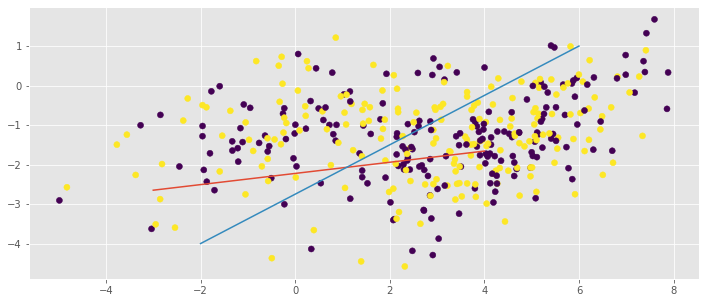

In [65]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])

C2 = np.array([[1., -0.7], [2., 0.7]])

gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

cl= MySGDClassifier(batch_generator(X, y, batch_size = 100 , MaxEpoch = 1000), max_epoch = 1000,model_type = 'log_reg' ,C = 1, alpha = 0.01)
cl.fit(X,y)

plot_decision_boundary(cl)
plt.plot([-2,6],[-4,1])

plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [11]:
from sklearn.datasets import make_classification

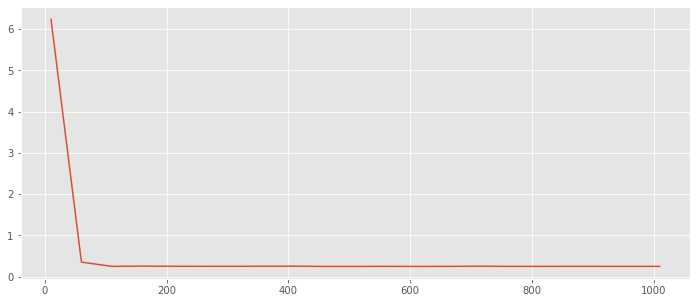

In [801]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)
ran = [0.01, 0.05, 0.1, 0.15]
res = []
for N in range(10, 1011, 50):
    me = []
    for al in ran:
        cl = MySGDClassifier(batch_generator(X, y, batch_size = 200, MaxEpoch = N), max_epoch = N,model_type = 'lin_reg' ,C = 1, alpha = al)
        cl.fit(X,y)
        me.append(cl.gives())
    res.append(np.mean(me))
plt.plot(np.arange(10, 1011, 50), res)

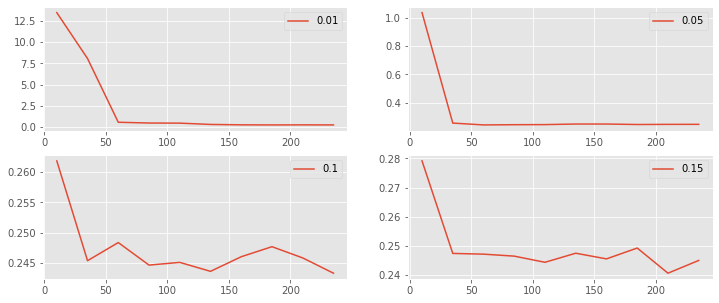

In [858]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)
ran = [0.01, 0.05, 0.1, 0.15]
fig, axes = plt.subplots(2, 2)
res = []
for N in range(10, 250, 25):
    cl = MySGDClassifier(batch_generator(X, y, batch_size = 200, MaxEpoch = N), max_epoch = N,model_type = 'lin_reg' ,C = 1, alpha = 0.01)
    cl.fit(X, y)
    res.append(cl.gives())
axes[0, 0].plot(np.arange(10, 250, 25), res, label = '0.01')
axes[0, 0].legend()
res = []
for N in range(10, 250, 25):
    cl = MySGDClassifier(batch_generator(X, y, batch_size = 200, MaxEpoch = N), max_epoch = N,model_type = 'lin_reg' ,C = 1, alpha = 0.05)
    cl.fit(X, y)
    res.append(cl.gives())
axes[0, 1].plot(np.arange(10, 250, 25), res, label = '0.05')
axes[0, 1].legend()
res = []
for N in range(10, 250, 25):
    cl = MySGDClassifier(batch_generator(X, y, batch_size = 200, MaxEpoch = N), max_epoch = N,model_type = 'lin_reg' ,C = 1, alpha = 0.1)
    cl.fit(X, y)
    res.append(cl.gives())
axes[1, 0].plot(np.arange(10, 250, 25), res, label = '0.1')
axes[1, 0].legend()
res = []
for N in range(10, 250, 25):
    cl = MySGDClassifier(batch_generator(X, y, batch_size = 200, MaxEpoch = N), max_epoch = N,model_type = 'lin_reg' ,C = 1, alpha = 0.15)
    cl.fit(X, y)
    res.append(cl.gives())
axes[1, 1].plot(np.arange(10, 250, 25), res, label = '0.15')
axes[1, 1].legend()

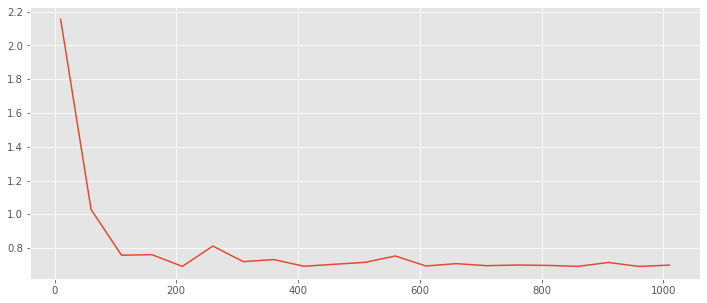

In [835]:
ran = [0.01, 0.05, 0.1, 0.15]
res = []
for N in range(10, 1011, 50):
    me = []
    for al in ran:
        cl = MySGDClassifier(batch_generator(X, y, batch_size = 200, MaxEpoch = N), max_epoch = N,model_type = 'log_reg' ,C = 1, alpha = al)
        cl.fit(X,y)
        me.append(cl.gives())
    res.append(np.mean(me))
plt.plot(np.arange(10, 1011, 50), res)

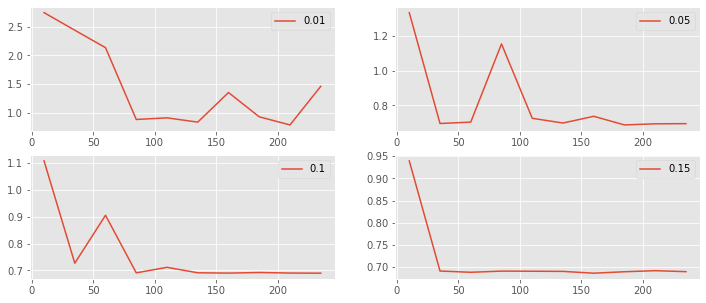

In [857]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)
ran = [0.01, 0.05, 0.1, 0.15]
fig, axes = plt.subplots(2, 2)
res = []
for N in range(10, 250, 25):
    cl = MySGDClassifier(batch_generator(X, y, batch_size = 200, MaxEpoch = N), max_epoch = N, model_type = 'log_reg' ,C = 1, alpha = 0.01)
    cl.fit(X, y)
    res.append(cl.gives())
axes[0, 0].plot(np.arange(10, 250, 25), res, label = '0.01')
axes[0, 0].legend()
res = []
for N in range(10, 250, 25):
    cl = MySGDClassifier(batch_generator(X, y, batch_size = 200, MaxEpoch = N), max_epoch = N, model_type = 'log_reg' ,C = 1, alpha = 0.05)
    cl.fit(X, y)
    res.append(cl.gives())
axes[0, 1].plot(np.arange(10, 250, 25), res, label = '0.05')
axes[0, 1].legend()
res = []
for N in range(10, 250, 25):
    cl = MySGDClassifier(batch_generator(X, y, batch_size = 200, MaxEpoch = N), max_epoch = N, model_type = 'log_reg' ,C = 1, alpha = 0.1)
    cl.fit(X, y)
    res.append(cl.gives())
axes[1, 0].plot(np.arange(10, 250, 25), res, label = '0.1')
axes[1, 0].legend()
res = []
for N in range(10, 250, 25):
    cl = MySGDClassifier(batch_generator(X, y, batch_size = 200, MaxEpoch = N), max_epoch = N, model_type = 'log_reg' ,C = 1, alpha = 0.15)
    cl.fit(X, y)
    res.append(cl.gives())
axes[1, 1].plot(np.arange(10, 250, 25), res, label = '0.15')
axes[1, 1].legend()

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

0.01 для линейной
0.15 для логистической

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

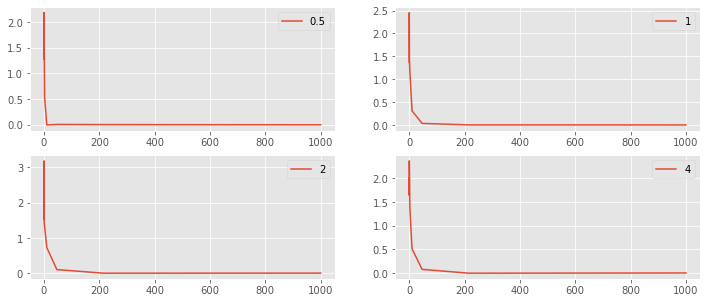

In [895]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)
fig, axes = plt.subplots(2, 2)
N=10
res = []
for N in np.logspace(3, -3, 10):
    cl = MySGDClassifier(batch_generator(X, y, batch_size = 200, MaxEpoch = int(N // 1)), max_epoch = int(N // 1), model_type = 'log_reg' , C = 0.5, alpha = 0.15)
    cl.fit(X, y)
    res.append(np.mean(cl.givew()))
axes[0, 0].plot(np.logspace(3, -3, 10), res, label = '0.5')
axes[0, 0].legend()

res = []
for N in np.logspace(3, -3, 10):
    cl = MySGDClassifier(batch_generator(X, y, batch_size = 200, MaxEpoch = int(N // 1)), max_epoch = int(N // 1), model_type = 'log_reg' , C = 1, alpha = 0.15)
    cl.fit(X, y)
    res.append(np.mean(cl.givew()))
axes[0, 1].plot(np.logspace(3, -3, 10), res, label = '1')
axes[0, 1].legend()

res = []
for N in np.logspace(3, -3, 10):
    cl = MySGDClassifier(batch_generator(X, y, batch_size = 200, MaxEpoch = int(N // 1)), max_epoch = int(N // 1), model_type = 'log_reg' , C = 2, alpha = 0.15)
    cl.fit(X, y)
    res.append(np.mean(cl.givew()))
axes[1, 0].plot(np.logspace(3, -3, 10), res, label = '2')
axes[1, 0].legend()
res = []
for N in np.logspace(3, -3, 10):
    cl = MySGDClassifier(batch_generator(X, y, batch_size = 200, MaxEpoch = int(N // 1)), max_epoch = int(N // 1), model_type = 'log_reg' , C = 4, alpha = 0.15)
    cl.fit(X, y)
    res.append(np.mean(cl.givew()))
axes[1, 1].plot(np.logspace(3, -3, 10), res, label = '4')
axes[1, 1].legend()


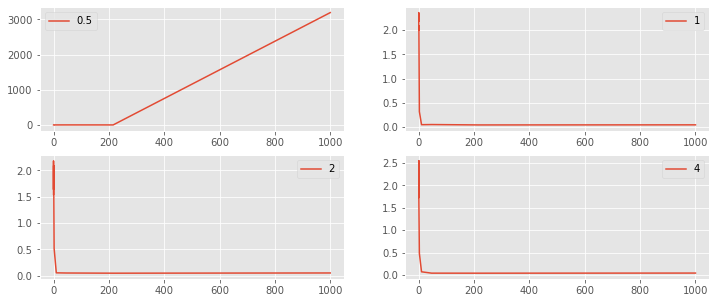

In [12]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)
fig, axes = plt.subplots(2, 2)
N=10
res = []
for N in np.logspace(3, -3, 10):
    cl = MySGDClassifier(batch_generator(X, y, batch_size = 200, MaxEpoch = int(N // 1)), max_epoch = int(N // 1), model_type = 'lin_reg' , C = 0.5, alpha = 0.15)
    cl.fit(X, y)
    res.append(np.mean(cl.givew()))
axes[0,0].plot(np.logspace(3, -3, 10), res, label = '0.5')
axes[0,0].legend()

res = []
for N in np.logspace(3, -3, 10):
    cl = MySGDClassifier(batch_generator(X, y, batch_size = 200, MaxEpoch = int(N // 1)), max_epoch = int(N // 1), model_type = 'lin_reg' , C = 1, alpha = 0.15)
    cl.fit(X, y)
    res.append(np.mean(cl.givew()))
axes[0,1].plot(np.logspace(3, -3, 10), res, label = '1')
axes[0,1].legend()

res = []
for N in np.logspace(3, -3, 10):
    cl = MySGDClassifier(batch_generator(X, y, batch_size = 200, MaxEpoch = int(N // 1)), max_epoch = int(N // 1), model_type = 'lin_reg' , C = 2, alpha = 0.15)
    cl.fit(X, y)
    res.append(np.mean(cl.givew()))
axes[1,0].plot(np.logspace(3, -3, 10), res, label = '2')
axes[1,0].legend()
res = []
for N in np.logspace(3, -3, 10):
    cl = MySGDClassifier(batch_generator(X, y, batch_size = 200, MaxEpoch = int(N // 1)), max_epoch = int(N // 1), model_type = 'lin_reg' , C = 4, alpha = 0.15)
    cl.fit(X, y)
    res.append(np.mean(cl.givew()))
axes[1,1].plot(np.logspace(3, -3, 10), res, label = '4')
axes[1,1].legend()


Довольны ли Вы, насколько сильно уменьшились Ваши веса? '

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [4]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [5]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [6]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [10]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***